In [42]:
import sympy as sym

sym.init_printing()

# Exercise 7.1: Symbolic calculation

Use [SymPy](https://docs.sympy.org/latest/index.html) library to complete the following tasks. 

**a)** Calculate $1 + \dfrac{1}{2} + \dfrac{1}{3} + \dfrac{1}{4} + \dots + \dfrac{1}{100}$ as a fraction (i.e. in the form $\dfrac{p}{q}$) and as a decimal number (use `sympy.Sum` function to define the sum and its `doit` and `evalf` methods to evaluate the sum).

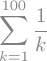

In [43]:
# We need to define all the symbols that we use in sympy 
# For now, let's define symbols x, n and k
x,n,k = sym.symbols(('x','n','k'))

# Define a sum as a sympy expression (not evaluated to any number by defaul)
expr = sym.Sum(1/k, (k,1,100))

expr

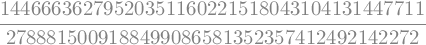

In [44]:
# We can use doit() method to evaluate a sympy expression as a fraction
expr.doit()

In [45]:
# We can use evalf() method to evaluate a sympy expression as a decimal number (with a certain precision)
expr.evalf()

**b)** Consider the following sequence of functions 

$$f_n(x) = \dfrac{x}{n}\exp(-\dfrac{x}{n})$$

Plot $f_1, f_2, \dots, f_{20}$ for $x\in[0,10]$ in the same graph (use `sympy.plot` for plotting).

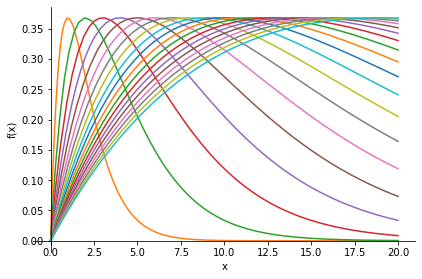

In [47]:
# We define f just as a sympy expression 
f = (x/n)*sym.exp(-x/n)

# We can use *[] to give all the elements of the list as arguments of sym.plot
# i.e. sym.plot(*[x**2, x**3]) is equivalent to sym.plot(x**2, x**3)
sym.plot(*[f.subs({n:i}) for i in range(20)], (x,0,20))

# We use f.subs method to specify the value of n 

**c)** Plot the function $f(x) = 1 - x^2$ and the tangent line that touches $f(x)$ at the point $x_0=(1/2,3/4)$. The equation of the tangent line can be obtained through Taylor expansion at point $x_0$ up to the first-order terms (you can use `f.series` method).

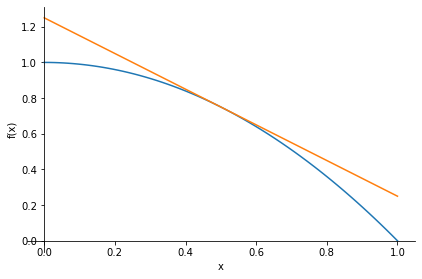

In [50]:
# Again, we define f simply as a sympy expression
f = (1-x**2)

# We use f.series method with n=2 to get the first-order taylor expansion of f at point x0
# removeO() method removes the additive O(...) symbol from the expression
tangent = f.series(x,x0=1/2, n=2).removeO()

sym.plot(f, tangent,(x,0,1))

**d)** For large $n\in\mathbb{N}$, the factorial $n!$ can be approximated with the Stirling's formula:

$$S(n) := \sqrt{2\pi n}\Bigl(\dfrac{n}{e}\Bigr)^n$$

Define $S$ as a function (or a SymPy expression) and calculate the relative error

$$\dfrac{n! - S(n)}{n!}$$

for $n=100$ as a decimal number.

Show that the following two limits hold:

$$\lim_{n\to\infty} \dfrac{n!}{S(n)} = 1$$

$$\lim_{n\to\infty} n \Bigl( \dfrac{n!}{S(n)} - 1\Bigr) = \dfrac{1}{12}$$

In [61]:
# We define S as a sympy expression
S = sym.sqrt(2*sym.pi*n)*(n/sym.E)**n

# Define the relative error expression
err = ((sym.factorial(n) - S)/sym.factorial(n))

# Evaluate the error at n=100 (using err.evalf(subs={n:100})) and print
print(f"The relative error at n={100} is {err.evalf(subs={n:100})}.")

The relative error at n=100 is 0.000832983432157000.


In [63]:
# Check the first limit using sympy.limit function
sym.limit(sym.factorial(n)/S, n, sym.oo)

In [64]:
# Check the first limit using sympy.limit function
sym.limit(n*(sym.factorial(n)/S - 1), n, sym.oo)

# Exercise 7.2: Riemann zeta function

The Riemann zeta function is defined as follows

$$\zeta(s) := \sum_{k=1}^\infty \dfrac{1}{k^s}$$

for $s$ such that $Re(s)>1$.

**a)** Check that for natural numbers $1 < n < 10$ the following recursive formula holds:

$$\zeta(2n) = \dfrac{1}{n+\frac{1}{2}}\sum_{k=1}^{n-1}\zeta(2k)\zeta\bigl(2(n-k)\bigr)$$

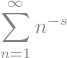

In [85]:
s,n,m,k = sym.symbols(('s','n','m','k'))

# Define the Riemann zeta function as a sympy expression
riemann_zeta = sym.Sum(n**-s,(n,1,sym.oo))

riemann_zeta

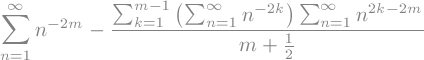

In [87]:
# Defile the difference of LHS and RHS of the above equation
diff = riemann_zeta.subs({s:2*m}) \
    - (1/(m+sym.Rational(1,2))
        * sym.Sum(riemann_zeta.subs({s:2*k}) 
                * riemann_zeta.subs({s:2*(m-k)}),(k,1,m-1)))

# Notice how we can substitue symbol s with another sympy expression (e.g. 2m or 2k) here

diff

In [88]:
# Now we check if for all values of m from 2 to 10 the difference is zero
# We use doit() to evaluase the expressions and is_zero() to check whether the result is zero
all([diff.subs({m:i}).doit().is_zero for i in range(2,10)])

# Notice that all() returns True only when all the elements of the list are True

True

**b)** Define another function $\eta$ as follows:

$$\eta(s) = \lim_{n\to\infty}\Bigl( \sum_{k=1}^n \dfrac{1}{k^s} - \dfrac{1}{1-s}n^{1-s} - \dfrac{1}{2}n^{-s} + \dfrac{s}{12}n^{-1-s} \Bigr)$$

for real $s>3$. Check that $\zeta$ and $\eta$ coincide on $(1,\infty)$ by showing that

$$ - \dfrac{1}{1-s}n^{1-s} - \dfrac{1}{2}n^{-s} + \dfrac{s}{12}n^{-1-s}  \to 0 \text{ as } n\to\infty$$

when $s\in (1,\infty)$ (use `sympy.limit` function).

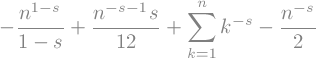

In [89]:
# Define the extra term in \eta function and the eta function itself as sympy expressions
eta_par = -1/(1-s)*n**(1-s) - n**-s/2 + s*n**(-1-s)/12
eta = sym.Sum(k**-s,(k,1,n)) + eta_par

eta

In [91]:
# Check that the limit of the extra term is zero

t = sym.Symbol('t', positive=True)

sym.limit(eta_par.subs({s:1+t}),n,sym.oo)

# Notice that we define t as a positive number, so 1+t is larger than 1

**c)** We can interpret $\eta$ as a continuation of $\zeta$ outside of $(1,\infty)$. Calculate $\eta(-1)$ (you can use `sympy.limit_seq` function to find the limit of an expression that includes `sympy.Sum`). How does this value relate to $\zeta(-1)$?

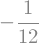

In [92]:
# Find the value of \eta at -1
sym.limit_seq(eta.subs({s:-1}),n)

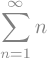

In [95]:
# Compare with the limit of the Riemann zeta function 
sym.limit_seq(riemann_zeta.subs({s:-1}),n)

# We see that the zeta function does not converge at -1

In [96]:
# We can also use doit() to see that the limit is infinite
sym.limit_seq(riemann_zeta.subs({s:-1}),n).doit()